In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy import signal
from spectrum import FourierSpectrum
from astropy.timeseries import LombScargle

In [2]:
DIR = './data/PeriodMean/20m'
fna = [name for name in os.listdir(DIR)]
fna.sort()
fno = len(fna)
tower = ['East', 'Flux', 'North', 'South', 'West']

ww20 = []
tt20 = []
Sweep20 = []
Ejection20 = []
Outward20 = []
Inward20 = []
CumSec20 = []

for fi in range(5):
    xls = pd.ExcelFile(f'./data/PeriodMean/20m/{fna[fi]}')
    df_pre = pd.read_excel(xls, 'Pre-FFP')
    df_dur = pd.read_excel(xls, 'FFP')
    df_post = pd.read_excel(xls, 'Post-FFP')

    df = [df_pre, df_dur, df_post]
    for di in range(3):
        ww20.append(df[di]["w' (m/s)"].dropna())
        tt20.append(df[di]["t' (C)"].dropna())
        Sweep20.append(df[di]["w't' (Sweep)"].dropna())
        Ejection20.append(df[di]["w't' (Ejection)"].dropna())
        Outward20.append(df[di]["w't' (Out Int)"].dropna())
        Inward20.append(df[di]["w't' (In Int)"].dropna())
        CumSec20.append(df[di].iloc[:, 0].dropna())

In [3]:
DIR = './data/PeriodMean/3m'
fna = [name for name in os.listdir(DIR)]
fna.sort()
fno = len(fna)
tower = ['East', 'Flux', 'North', 'South', 'West']

ww3 = []
tt3 = []
Sweep3 = []
Ejection3 = []
Outward3 = []
Inward3 = []
CumSec3 = []
for fi in range(5):
    xls = pd.ExcelFile(f'./data/PeriodMean/3m/{fna[fi]}')
    df_pre = pd.read_excel(xls, 'Pre-FFP')
    df_dur = pd.read_excel(xls, 'FFP')
    df_post = pd.read_excel(xls, 'Post-FFP')

    df = [df_pre, df_dur, df_post]
    for di in range(3):
        ww3.append(df[di]["w' (m/s)"].dropna())
        tt3.append(df[di]["t' (C)"].dropna())
        Sweep3.append(df[di]["w't' (Sweep)"].dropna())
        Ejection3.append(df[di]["w't' (Ejection)"].dropna())
        Outward3.append(df[di]["w't' (Out Int)"].dropna())
        Inward3.append(df[di]["w't' (In Int)"].dropna())
        CumSec3.append(df[di].iloc[:, 0].dropna())

In [4]:
DIR = './data/PeriodMean/10m'
fna = [name for name in os.listdir(DIR)]
fna.sort()
fno = len(fna)
tower = ['East', 'Flux', 'North', 'West']

ww10 = []
tt10 = []
Sweep10 = []
Ejection10 = []
Outward10 = []
Inward10 = []
CumSec10 = []
for fi in range(4):
    xls = pd.ExcelFile(f'./data/PeriodMean/10m/{fna[fi]}')
    df_pre = pd.read_excel(xls, 'Pre-FFP')
    df_dur = pd.read_excel(xls, 'FFP')
    df_post = pd.read_excel(xls, 'Post-FFP')

    df = [df_pre, df_dur, df_post]
    for di in range(3):
        ww10.append(df[di]["w' (m/s)"].dropna())
        tt10.append(df[di]["t' (C)"].dropna())
        Sweep10.append(df[di]["w't' (Sweep)"].dropna())
        Ejection10.append(df[di]["w't' (Ejection)"].dropna())
        Outward10.append(df[di]["w't' (Out Int)"].dropna())
        Inward10.append(df[di]["w't' (In Int)"].dropna())
        CumSec10.append(df[di].iloc[:, 0].dropna())

In [37]:
# heat flux total
heat_tot3 = [Sweep3[i].values + Ejection3[i].values + Inward3[i].values + Outward3[i].values for i in range(15)]
heat_tot10 = [Sweep10[i].values + Ejection10[i].values + Inward10[i].values + Outward10[i].values for i in range(12)]
heat_tot20 = [Sweep20[i].values + Ejection20[i].values + Inward20[i].values + Outward20[i].values for i in range(15)]

In [20]:
def spectrum1(h, dt):
    """
    First cut at spectral estimation: very crude.
    
    Returns frequencies, power spectrum, and
    power spectral density.
    Only positive frequencies between (and not including)
    zero and the Nyquist are output.
    """
    nt = len(h)
    npositive = nt//2
    pslice = slice(1, npositive)
    freqs = np.fft.fftfreq(nt, d=dt)[pslice] 
    ft = np.fft.fft(h)[pslice]
    psraw = np.abs(ft) ** 2
    # Double to account for the energy in the negative frequencies.
    psraw *= 2
    # Normalization for Power Spectrum
    psraw /= nt**2
    # Convert PS to Power Spectral Density
    psdraw = psraw * nt  # nt * dt is record length
    return freqs, psraw, psdraw

In [18]:
freq = np.linspace(0, 5, 9001)[1:]
smoothlen = 46
def plot(ax, yr, time, data, color):
    power = LombScargle(time, data, normalization='psd').power(freq)

#     psdtemp = np.zeros(smoothlen)
#     for si in range(smoothlen):
#         psdtemp[si] = power[smoonthloc[si]:smoonthloc[si+1]].mean()
#     ax.loglog(FreqSmooth, psdtemp, color, lw=1)
#     ax.semilogx(freq, power, color, lw=1) 
    ax.loglog(freq, power, color, lw=1)
    ax.set_ylim(0.001, yr)
    ax.set_xlim(.001, 1)
    ax.legend(['Pre-FFP', 'FFP', 'Post-FFP'], fontsize='large')
    
fig, axs = plt.subplots(5, 3, figsize=(15, 25))
tower = ['East', 'Flux', 'North', 'South', 'West']
Outward = [Outward3, Outward10, Outward20]
CumSec = [CumSec3, CumSec10, CumSec20]
title = ['Outward']
yr = 200

for ti in range(5):
    for hi in range(3):
        ax = plt.subplot(5,3,ti*3+hi+1)
        if (hi==1) and (ti==4):
#             plot(ax, yr, np.where(abs(Outward[hi][(ti-1)*3+0])>0.000001, 1, 0), 'lime') 
#             plot(ax, yr, np.where(abs(Outward[hi][(ti-1)*3+1])>0.000001, 1, 0), 'r') 
#             plot(ax, yr, np.where(abs(Outward[hi][(ti-1)*3+2])>0.000001, 1, 0), 'k')
            plot(ax, yr, CumSec[hi][(ti-1)*3+0], Outward[hi][(ti-1)*3+0], 'lime') 
            plot(ax, yr, CumSec[hi][(ti-1)*3+1], Outward[hi][(ti-1)*3+1], 'r') 
            plot(ax, yr, CumSec[hi][(ti-1)*3+2], Outward[hi][(ti-1)*3+2], 'k')
        elif (hi==1) and (ti==3):
            plot(ax, yr, np.nan*CumSec[hi][(ti-1)*3+0], np.nan*Outward[hi][(ti-1)*3+0], 'k')
        else:
#             plot(ax, yr, np.where(abs(Outward[hi][ti*3+0])>0.000001, 1, 0), 'lime') 
#             plot(ax, yr, np.where(abs(Outward[hi][ti*3+1])>0.000001, 1, 0), 'r') 
#             plot(ax, yr, np.where(abs(Outward[hi][ti*3+2])>0.000001, 1, 0), 'k')
            plot(ax, yr, CumSec[hi][ti*3+0], Outward[hi][ti*3+0], 'lime') 
            plot(ax, yr, CumSec[hi][ti*3+1], Outward[hi][ti*3+1], 'r') 
            plot(ax, yr, CumSec[hi][ti*3+2], Outward[hi][ti*3+2], 'k')
        
        if hi == 0:
            ax.set_ylabel('Power Spectral Density', fontsize='large', fontweight='bold')
        if ti == 4:
            ax.set_xlabel('Frequency', fontsize='large', fontweight='bold')
                    
        if ti == 0:
            if hi == 0:
                plt.text(.5, 1.03, '3m', fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)
            elif hi == 1:
                plt.text(.5, 1.03, '10m', fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)
            elif hi == 2:
                plt.text(.5, 1.03, '20m', fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)
        if hi == 2:
            plt.text(1.05, .9, tower[ti], fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)

plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = .1, wspace = .1)
# plt.suptitle(f"Power Spectrum Density of {title[0]} Occurrences", fontsize=15, fontweight='bold', x=.5, y=1.02)
# plt.savefig(f'./plot/paper/spectral/PSD_Occur_{title[0]}.png', bbox_inches='tight')
plt.suptitle(f"Power Spectrum Density of {title[0]}", fontsize=15, fontweight='bold', x=.5, y=1.02)
plt.savefig(f'./plot/paper/spectral/PSD_Value_{title[0]}_loglog.png', bbox_inches='tight')
plt.close()

In [6]:
df = pd.read_table('./data/FreqForSmooth.txt', delim_whitespace=True, names=('period', 'ps', 'freq', 'cumps', 'sump', 'cumsump', 'index'))
FreqSmooth = df['freq']
smoonthloc = [0]
smoonthloc.extend(df['cumsump'])
smoothlen = len(FreqSmooth)

In [7]:
# define function to calculate the slope of -5/3
from scipy import stats
def calc_slope1(psd):
    psdsmoonthed = np.zeros(smoothlen)
    for si in range(smoothlen):
        psdsmoonthed[si] = psd[smoonthloc[si]:smoonthloc[si+1]].mean()
    r = stats.linregress(np.log(FreqSmooth[28:-4]), np.log(psdsmoonthed[28:-4]))
    return r.slope

In [21]:
freq = np.linspace(0, 5, 9001)[1:]
slope = np.zeros(9)
psd3_pre = 0
psd3_ffp = 0
psd3_pos = 0
for ti in range(5):
    psdtemp = LombScargle(CumSec3[ti*3+0], heat_tot3[0+3*ti], normalization='psd').power(freq)
    psd3_pre += psdtemp
    slope[0] += calc_slope1(psdtemp)
    psdtemp = LombScargle(CumSec3[ti*3+1], heat_tot3[1+3*ti], normalization='psd').power(freq)
    psd3_ffp += psdtemp
    slope[1] += calc_slope1(psdtemp)
    psdtemp = LombScargle(CumSec3[ti*3+2], heat_tot3[2+3*ti], normalization='psd').power(freq)
    psd3_pos += psdtemp
    slope[2] += calc_slope1(psdtemp)
psd3_pre = psd3_pre/5.
psd3_ffp = psd3_ffp/5.
psd3_pos = psd3_pos/5.
slope[0] = slope[0]/5.
slope[1] = slope[1]/5.
slope[2] = slope[2]/5.

psd10_pre = 0
psd10_ffp = 0
psd10_pos = 0
for ti in range(4):
    psdtemp = LombScargle(CumSec10[ti*3+0], heat_tot10[0+3*ti], normalization='psd').power(freq)
    psd10_pre += psdtemp
    slope[3] += calc_slope1(psdtemp)
    psdtemp = LombScargle(CumSec10[ti*3+1], heat_tot10[1+3*ti], normalization='psd').power(freq)
    psd10_ffp += psdtemp
    slope[4] += calc_slope1(psdtemp)
    psdtemp = LombScargle(CumSec10[ti*3+2], heat_tot10[2+3*ti], normalization='psd').power(freq)
    psd10_pos += psdtemp
    slope[5] += calc_slope1(psdtemp)
psd10_pre = psd10_pre/4.
psd10_ffp = psd10_ffp/4.
psd10_pos = psd10_pos/4.
slope[3] = slope[3]/4.
slope[4] = slope[4]/4.
slope[5] = slope[5]/4.

psd20_pre = 0
psd20_ffp = 0
psd20_pos = 0
for ti in range(5):
    psdtemp = LombScargle(CumSec20[ti*3+0], heat_tot20[0+3*ti], normalization='psd').power(freq)
    psd20_pre += psdtemp
    slope[6] += calc_slope1(psdtemp)
    psdtemp = LombScargle(CumSec20[ti*3+1], heat_tot20[1+3*ti], normalization='psd').power(freq)
    psd20_ffp += psdtemp
    slope[7] += calc_slope1(psdtemp)
    psdtemp = LombScargle(CumSec20[ti*3+2], heat_tot20[2+3*ti], normalization='psd').power(freq)
    psd20_pos += psdtemp
    slope[8] += calc_slope1(psdtemp)
psd20_pre = psd20_pre/5.
psd20_ffp = psd20_ffp/5.
psd20_pos = psd20_pos/5.
slope[6] = slope[6]/5.
slope[7] = slope[7]/5.
slope[8] = slope[8]/5.

variance = [np.nansum(psd3_pre),np.nansum(psd3_ffp),np.nansum(psd3_pos),np.nansum(psd10_pre),np.nansum(psd10_ffp),
            np.nansum(psd10_pos),np.nansum(psd20_pre),np.nansum(psd20_ffp),np.nansum(psd20_pos)]

psd = [psd3_pre, psd3_ffp, psd3_pos, psd10_pre, psd10_ffp, psd10_pos, psd20_pre, psd20_ffp, psd20_pos]

vn = 'heat_tot'

In [9]:
# define function to calculate the slope of -5/3
from scipy import stats
def calc_slope(psd):
    r = stats.linregress(np.log(FreqSmooth[28:-4]), np.log(psd[28:-4]))
    return r.slope

In [23]:
# [len(ww10[i*3+1]) for i in range(4)] #7545, 8988, 8969
if vn in ['Ejection', 'heat_tot']:
    ylim = 1000000
else:
    ylim = 10000
def plot(ax, yr, f, psd, color):
    ax.loglog(f, psd, color, lw=1)
    ax.set_ylim(0.001, ylim)
    ax.set_xlim(.001, 1.)

yr = [ylim for i in range(3)]
fig, axs = plt.subplots(1, 3, figsize=(9, 12))
for hi in range(3):
    ax = plt.subplot(3,1,3-hi)
    psdpre = np.zeros(smoothlen)
    psdffp = np.zeros(smoothlen)
    psdpos = np.zeros(smoothlen)
    for si in range(smoothlen):
        psdpre[si] = psd[hi*3][smoonthloc[si]:smoonthloc[si+1]].mean()
        psdffp[si] = psd[hi*3+1][smoonthloc[si]:smoonthloc[si+1]].mean()
        psdpos[si] = psd[hi*3+2][smoonthloc[si]:smoonthloc[si+1]].mean()
    plot(ax, yr[hi], FreqSmooth, psdpre, 'lime')
    plot(ax, yr[hi], FreqSmooth, psdffp, 'r')
    plot(ax, yr[hi], FreqSmooth, psdpos, 'k')
    if vn == 'Inward' or vn == 'Ejection':
        ax.loglog(FreqSmooth[28:], FreqSmooth[28:]**(-5/3) * psdpre[35] / 10, 'm--')
        ax.loglog(FreqSmooth[28:], FreqSmooth[28:]**(-5/3) * psdffp[35] / 10, 'm--')
    else:
        ax.loglog(FreqSmooth[28:], FreqSmooth[28:]**(-5/3) * psdffp[28] / 50, 'm--')
    if hi == 0:
        plt.xlabel('Frequency ($s^{-1}$)', fontsize='large')
    plt.ylabel('PSD ($\u2103^{2}m^{2}s^{{-2}}$)', fontsize='large')
    plt.legend([f'Pre-FFP ({calc_slope(psdpre):.2f}) ({slope[hi*3]:.2f})', f'FFP ({calc_slope(psdffp):.2f}) ({slope[hi*3+1]:.2f})',
                f'Post-FFP ({calc_slope(psdpos):.2f}) ({slope[hi*3+2]:.2f})',
                '$k^{-5/3}$'+f' ({-5/3:.2f})'], loc='upper right', frameon=False, fontsize='large')

    if hi == 0:
        plt.text(.05, .95, '3m', fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)
    elif hi == 1:
        plt.text(.05, .95, '10m', fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)
    elif hi == 2:
        plt.text(.05, .95, '19m', fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)
plt.suptitle(f"Power Spectrum Density of {vn}", fontsize='x-large', fontweight='bold', x=.5, y=.98)
plt.subplots_adjust(top = .95, bottom = .05, right = .95, left = .1, 
            hspace = .1, wspace = 0)
plt.savefig(f'./plot/paper/spectral/PSD{vn}_Averaged_loglog_smoonthed.png', bbox_inches='tight')
plt.close()

In [10]:
# # [len(ww10[i*3+1]) for i in range(4)] #7545, 8988, 8969

# ylim = 100000
# def plot(ax, yr, f, psd, color):
#     ax.loglog(f, psd, color, lw=1)
#     ax.set_ylim(0.001, ylim)
#     ax.set_xlim(.001, 1.)

# yr = [ylim for i in range(3)]
# fig, axs = plt.subplots(1, 3, figsize=(9, 12))
# for hi in range(3):
#     ax = plt.subplot(3,1,3-hi)
#     plot(ax, yr[hi], freq, psd[hi*3], 'lime')
#     plot(ax, yr[hi], freq, psd[1+hi*3], 'r')
#     plot(ax, yr[hi], freq, psd[2+hi*3], 'k')
#     if hi == 0:
#         plt.xlabel('Frequency ($s^{-1}$)', fontsize='large')
#     plt.ylabel('PSD ($\u2103^{2}m^{2}s^{{-2}}$)', fontsize='large')
#     plt.legend([f'Pre-FFP', f'FFP',
#                 f'Post-FFP'], loc='upper right', frameon=False, fontsize='large')

#     if hi == 0:
#         plt.text(.05, .95, '3m', fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)
#     elif hi == 1:
#         plt.text(.05, .95, '10m', fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)
#     elif hi == 2:
#         plt.text(.05, .95, '19m', fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)
# plt.suptitle(f"Power Spectrum Density of {vn}", fontsize='x-large', fontweight='bold', x=.5, y=.98)
# plt.subplots_adjust(top = .95, bottom = .05, right = .95, left = .1, 
#             hspace = .1, wspace = 0)
# plt.savefig(f'./plot/paper/spectral/PSD{vn}_Averaged_loglog.png', bbox_inches='tight')
# plt.close()

In [11]:
# # [len(ww10[i*3+1]) for i in range(4)] #7545, 8988, 8969
# psd = [psd[i]/variance[i] for i in range(9)]

# ylim = .1
# def plot(ax, yr, f, psd, color):
#     ax.semilogx(f, psd, color, lw=1)
#     ax.set_ylim(0, ylim)
#     ax.set_xlim(.001, 0.5)

# yr = [ylim for i in range(3)]
# fig, axs = plt.subplots(1, 3, figsize=(9, 12))
# for hi in range(3):
#     ax = plt.subplot(3,1,3-hi)
#     plot(ax, yr[hi], freq, psd[hi*3], 'lime')
#     plot(ax, yr[hi], freq, psd[1+hi*3], 'r')
#     plot(ax, yr[hi], freq, psd[2+hi*3], 'k')
#     if hi == 0:
#         plt.xlabel('Frequency ($s^{-1}$)', fontsize='large')
#     plt.ylabel('norm PSD', fontsize='large')
#     plt.legend([f'Pre-FFP ({variance[hi*3]/len(freq):.2f} $\u2103^{2}m^{2}s^{{-2}})$', f'FFP ({variance[hi*3+1]/len(freq):.2f} $\u2103^{2}m^{2}s^{{-2}})$',
#                 f'Post-FFP ({variance[hi*3+2]/len(freq):.2f} $\u2103^{2}m^{2}s^{{-2}})$'], loc='upper right', frameon=False, fontsize='large')

#     if hi == 0:
#         plt.text(.05, .95, '3m', fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)
#     elif hi == 1:
#         plt.text(.05, .95, '10m', fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)
#     elif hi == 2:
#         plt.text(.05, .95, '19m', fontsize='large', fontweight='bold', ha='center', va='center', transform=ax.transAxes)
# plt.suptitle(f"Normalized Power Spectrum Density of {vn}", fontsize='x-large', fontweight='bold', x=.5, y=.98)
# plt.subplots_adjust(top = .95, bottom = .05, right = .95, left = .1, 
#             hspace = .1, wspace = 0)
# plt.savefig(f'./plot/paper/spectral/PSD{vn}_Averaged_logx.png', bbox_inches='tight')
# plt.close()

<font size=4 color=blue>FFT for Comparison

In [37]:
xls = pd.ExcelFile('./data/2019_West_Tower_3mAGL_Sweep_Data_for_Diane_Joey.xlsx')
df_pre = pd.read_excel(xls, 'Pre-FFP')
df_dur = pd.read_excel(xls, 'FFP')
df_post = pd.read_excel(xls, 'Post-FFP')
data = [df_pre["S'w' (Sweep)"], df_dur["S'w' (Sweep)"], df_post["S'w' (Sweep)"]]

In [6]:
# from spectrum import DaniellPeriodogram
# from spectrum import WelchPeriodogram
# i = 0
# l = len(data[i])
# s = FourierSpectrum(data[i], sampling=10, scale_by_freq=True, window='hanning')
# s.periodogram()

# s = DaniellPeriodogram(data[i], 8, sampling=10, detrend='mean', NFFT=l, window='hamming')
# s = WelchPeriodogram(data[i], sampling=10, detrend='mean')

In [3]:
# f = s.frequencies()
# psd = s.psd

# Y = (np.array(f) ** (-5/3))

# plt.semilogx(f, psd, f, Y)

# plt.loglog(s[0][1], s[0][0], 'k-', f[500:], Y[500:]/50, 'r-')

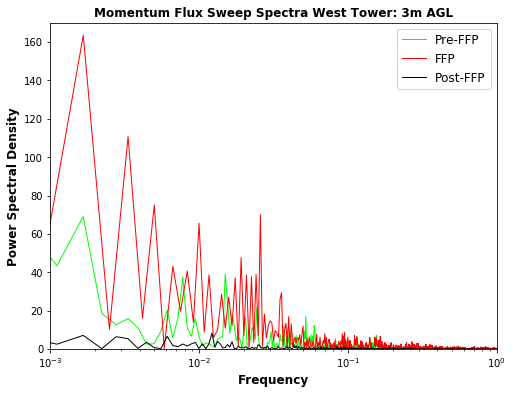

In [41]:
color = ['lime', 'r', 'k']
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
for i in range(3):
    f, ps, psd = spectrum1(data[i], .1)
    ax.semilogx(f, psd, color[i], lw=1)
ax.set_ylim(0, 170)
ax.set_xlim(.001, 1)
ax.set_ylabel('Power Spectral Density', fontsize='large', fontweight='bold')
ax.set_xlabel('Frequency', fontsize='large', fontweight='bold')
ax.set_title('Momentum Flux Sweep Spectra West Tower: 3m AGL', fontweight='bold', fontsize='large')
ax.legend(['Pre-FFP', 'FFP', 'Post-FFP'], fontsize='large')

In [10]:
# from spectrum import WelchPeriodogram
# title = ['Pre-FFP', 'FFP', 'Post-FFP']
# fig, axs = plt.subplots(1, 3, figsize=(15, 4))
# for i in range(3):
#     ax = plt.subplot(1,3,i+1)
#     s = WelchPeriodogram(data[i], sampling=10, detrend='mean', label='_nolegend_')
#     Y = (np.array(s[0][1]) ** (-5/3))
#     ax.loglog(s[0][1], s[0][0], 'k-', s[0][1], Y/100, 'r--')
#     plt.title(title[i], fontweight='bold')
#     ax.legend(['3m Sweep', '$k^{-5/3}$'])

In [21]:
df = pd.read_table('./test.txt', delim_whitespace=True, names=('index', 'value'))
f, ps, psd = spectrum1(df.value.values, 1)
ps.sum()+df.value.values.mean()**2, np.nanvar(df.value.values)
# psd.sum() / 64
# (ps / ps.sum()).sum()
# df

(73.69497136168958, 73.6949655253304)

In [31]:
power = LombScargle(df.index.values, df.value.values, normalization='psd').power(f)
np.nansum(power) *2 / 63

73.84886023132125

In [73]:
freq = np.linspace(0, 5, 9000)
ti = 0
power = LombScargle(CumSec3[ti*3+2], Ejection3[2+3*ti], normalization='psd').power(freq)
np.nansum(power) / len(freq), np.nanvar(Ejection3[2+3*ti]), len(Ejection3[2+3*ti])

(0.041015705452555874, 0.04100361740764172, 18000)

### Test Lomb-Scargle Periodograms program

In [3]:
w = np.array([0, -2, -1, 1, -2, 2, 1, 1])
q = np.array([8, 9, 9, 6, 10, 3, 5, 6])
ww = w - w.mean()
qq = q - q.mean()
ww**2, qq**2

(array([0., 4., 1., 1., 4., 4., 1., 1.]),
 array([ 1.,  4.,  4.,  1.,  9., 16.,  4.,  1.]))

In [4]:
wfft = np.fft.fft(w) / 8.
qfft = np.fft.fft(q) / 8.
freq = np.fft.fftfreq(8)[:4]
# plt.loglog(freq, (abs(wfft) ** 2)[:4])

In [7]:
Co = wfft.real * qfft.real + wfft.imag * qfft.imag
Qu = wfft.imag * qfft.real - wfft.real * qfft.imag
Co[:4].sum()*2, (ww*qq).mean()
# np.arctan(Qu/Co) * 180 / np.pi + 180
# Co

(-2.5, -3.0)

In [46]:
def get_cospectra(a, b, n):
    afft = np.fft.fft(a, n=n) / len(a)
    bfft = np.fft.fft(b, n=n) / len(b)
    Co = afft.real * bfft.real + afft.imag * bfft.imag
    Qu = afft.imag * bfft.real - afft.real * bfft.imag
    return Co, Qu

In [50]:
dfpre = pd.read_csv('./data/East_Pre-FFP.csv')
dfffp = pd.read_csv('./data/East_FFP.csv')
dfpos = pd.read_csv('./data/East_Post-FFP.csv')
# dfpre

In [51]:
preffp_Co, prefft_Qu = get_cospectra(dfpre['W_20m']-dfpre['W_20m'].mean(), dfpre['T_20m']-dfpre['T_20m'].mean(), 18000)
ffp_Co, fft_Qu = get_cospectra(dfffp['W_20m']-dfpre['W_20m'].mean(), dfffp['T_20m']-dfpre['T_20m'].mean(), 18000)
posffp_Co, posfft_Qu = get_cospectra(dfpos['W_20m']-dfpos['W_20m'].mean(), dfpos['T_20m']-dfpos['T_20m'].mean(), 18000)

In [34]:
freq1 = np.fft.fftfreq(18000, d=0.1)[:9000]
freq2 = np.fft.fftfreq(9000, d=0.1)[:4500]

In [52]:
Co1 = np.where(preffp_Co[:9000]>0, preffp_Co[:9000], np.nan)
Co2 = np.where(ffp_Co[:9000]>0, ffp_Co[:9000], np.nan)
Co3 = np.where(posffp_Co[:9000]>0, posffp_Co[:9000], np.nan)

Text(0.5, 1.0, "Cospectrum of w' and t' (total heat flux) at East Tower at 19m")

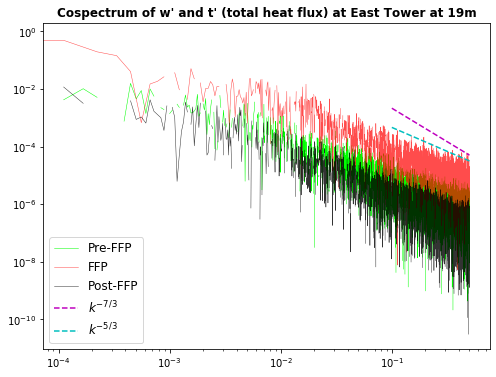

In [108]:
fig, axs = plt.subplots(1, 1, figsize=(8, 6))
plt.loglog(freq1, Co1, color='lime', lw=.5)
plt.loglog(freq2, Co2, color='r', lw=.5, alpha=.7)
plt.loglog(freq1, Co3, color='k', lw=.5, alpha=.8)
plt.loglog(freq1[np.where(freq1>.1)[0][0]:], freq1[np.where(freq1>.1)[0][0]:]**(-7/3) / 100000, 'm--')
plt.loglog(freq1[np.where(freq1>.1)[0][0]:], freq1[np.where(freq1>.1)[0][0]:]**(-5/3) / 100000, 'c--')
plt.legend(['Pre-FFP', 'FFP', 'Post-FFP', '$k^{-7/3}$', '$k^{-5/3}$'], fontsize='large')
plt.title("Cospectrum of w' and t' (total heat flux) at East Tower at 19m", fontsize='large', fontweight='bold')

In [59]:
np.isnan(np.array([1,2,3,np.nan]))

array([False, False, False,  True])